In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline
def extract_log(log_path):
    logs = []
    with open(log_path) as f:
        for line in f.readlines():
            if line.startswith('epoch'):
                line = line.strip()
                fields = line.split(',')
                log = [float(field.split(':')[1].strip()) for field in fields]
                logs.append(log)
    return logs

def get_cmap(N):
    color_norm  = colors.Normalize(vmin=0, vmax=N)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

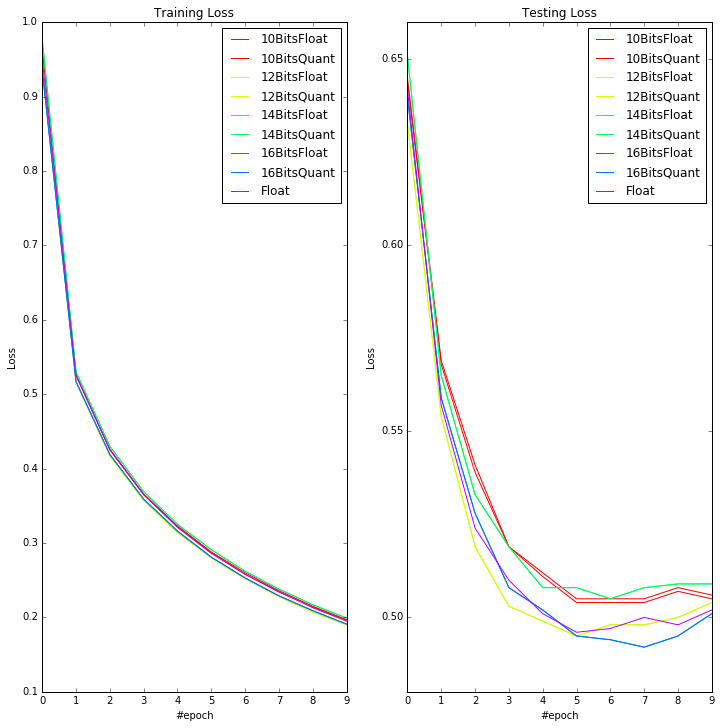

In [14]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
files = [str(2 * i) + 'Bits' for i in range(5, 9)]
cls = get_cmap(len(files) + 1)
for i, file in enumerate(files):
    color = cls(i)
    log = np.array(extract_log('../exps/keepfloatUpdateWithQuant' + file + '/log'))
    ax1.plot(log[:, 1], c = color, label=file + 'Float')
    ax1.plot(log[:, 2], c = color, label=file + 'Quant')
    
    ax2.plot(log[:, 4], c = color, label=file + 'Float')
    ax2.plot(log[:, 5], c = color, label=file + 'Quant')


log = np.array(extract_log('../exps/keepfloatUpdateWithQuantFloat/log'))
ax1.plot(log[:, 1], c=cls(len(files)), label='Float')
ax2.plot(log[:, 4], c=cls(len(files)), label='Float')

ax1.set_xlabel('#epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.legend(loc='best')
ax2.set_xlabel('#epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Testing Loss')
ax2.legend(loc='best')
plt.savefig('../vis/keepfloatupdatewithquant10-16bits.eps')
plt.show()